In [4]:
import pandas as pd
import os

# 将12个月的数据合并到一个文件夹里面

In [5]:
files = [file for file in os.listdir('Pandas_learning/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
for file in files:
    print(file)

All_months_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
all_months_Data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Pandas_learning/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_Data=pd.concat([all_months_Data,df])
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_months_Data.to_csv("Pandas_learning/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/All_months_data.csv",index=False)

In [8]:
all_months_Data= pd.read_csv("Pandas_learning/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/All_months_data.csv")
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# 清理数据的空值

In [9]:
NAN_df = all_months_Data[all_months_Data.isna().any(axis=1)]
NAN_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1493125,NaN,NaN,NaN,NaN,NaN,NaN
1493387,NaN,NaN,NaN,NaN,NaN,NaN
1493991,NaN,NaN,NaN,NaN,NaN,NaN
1494497,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_months_Data=all_months_Data.dropna(how='all')
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# 添加一个月份列

# 消除 invalid literal for int() with base 10: 'Order ID''错误

In [11]:
all_months_Data = all_months_Data[all_months_Data['Order Date'].str[0:2] !='Or']

In [12]:
all_months_Data['Order Date']=pd.to_datetime(all_months_Data['Order Date'])
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_months_Data['Month']=all_months_Data['Order Date'].astype('str').apply(lambda x:x.split('-')[1])
all_months_Data['Month'] = all_months_Data['Month'].astype('int32')
all_months_Data['Month']

0           4
1           7
2          12
3          12
4           4
           ..
1494794     9
1494795     9
1494796     9
1494797     9
1494798     9
Name: Month, Length: 1487600, dtype: int32

In [12]:
all_months_Data['Sales']=all_months_Data['Quantity Ordered']*all_months_Data['Price Each']
all_months_Data.head()

TypeError: can't multiply sequence by non-int of type 'str'

In [14]:
all_months_Data['Quantity Ordered']=pd.to_numeric(all_months_Data['Quantity Ordered'])
all_months_Data['Price Each']=pd.to_numeric(all_months_Data['Price Each'])

In [16]:
all_months_Data['Sales']=all_months_Data['Quantity Ordered']*all_months_Data['Price Each']
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
cols = list(all_months_Data.columns)
all_months_Data=all_months_Data[cols[:4]+[cols[-1]]+cols[4:7]]
all_months_Data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
1494794,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
1494795,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
1494796,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
1494797,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [18]:
all_months_Data.groupby('Month').sum()['Sales']

Month
1     15042703.24
2     17808623.87
3     22442788.10
4     26964457.02
5     25101523.02
6     20729218.34
7     21256302.91
8     18158316.73
9     17096671.73
10    29632624.91
11    25483547.67
12    36219510.22
Name: Sales, dtype: float64

In [19]:
results=all_months_Data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,89916,14955357.02,15042703.24
2,108872,17701256.06,17808623.87
3,135965,22315353.33,22442788.10
4,163056,26783454.70,26964457.02
5,149007,24960020.11,25101523.02
6,122682,20604637.48,20729218.34
7,129117,21135598.24,21256302.91
8,109237,18042028.20,18158316.73
9,106472,16995637.53,17096671.73


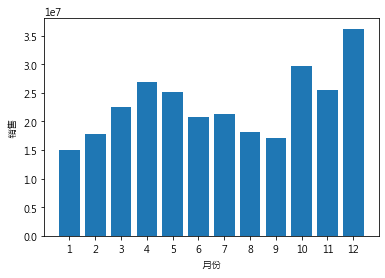

In [20]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("销售")
plt.xlabel("月份")
plt.show()


# 增加城市列

In [21]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_months_Data['City']=all_months_Data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


# 哪个城市销量最高

In [22]:
results = all_months_Data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),132816,22239265.60,22363988.64,835612
Austin (TX),89224,14478988.88,14556654.00,557231
Boston (MA),180224,29099278.16,29293136.08,1125312
Dallas (TX),133840,22021022.56,22143803.20,833716
Los Angeles (CA),266312,43371481.84,43620566.40,1660746
New York City (NY),223456,37082966.64,37314539.44,1400813
Portland (ME),22000,3577514.00,3598066.16,136609
Portland (OR),90424,14884465.76,14965858.72,563160
San Francisco (CA),401912,65691693.92,66097631.28,2515390


In [23]:
cities = all_months_Data['City'].unique()
cities

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

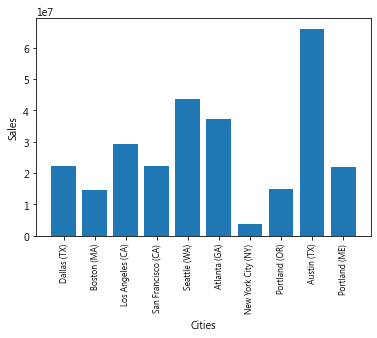

In [24]:

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Cities')
plt.show()

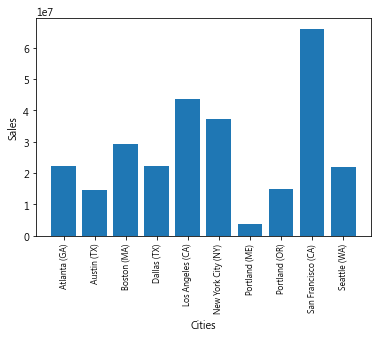

In [25]:
cities = [city for city,all_months_Data in all_months_Data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Cities')
plt.show()

In [26]:
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [27]:
all_months_Data['Order Date']=pd.to_datetime(all_months_Data['Order Date'])

In [28]:
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [29]:
all_months_Data['Hour']=all_months_Data['Order Date'].dt.hour
all_months_Data['Count']=1
all_months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,1
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA),22,1
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,1


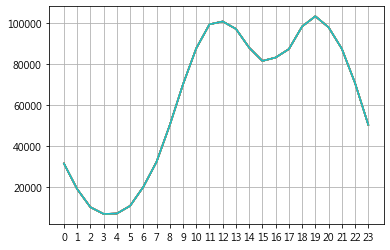

In [30]:
hours = [hour for hour,all_months_Data in all_months_Data.groupby('Hour')]
plt.plot(hours,all_months_Data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [31]:
all_months_Data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,1
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA),22,1
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,1


# 哪些商品是捆绑购买的

In [32]:
df = all_months_Data[all_months_Data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Count,Grouped
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,1,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",7,Boston (MA),22,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,176560,Google Phone,1,600.00,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1,"Google Phone,Wired Headphones,Google Phone,Wir..."
3,176560,Wired Headphones,1,11.99,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,Los Angeles (CA),14,1,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,1,"Wired Headphones,Wired Headphones,Wired Headph..."


In [33]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(5)

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
1,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
5,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [43]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = list(set(row.split(',')))
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1011
('Google Phone', 'USB-C Charging Cable') 997
('Wired Headphones', 'iPhone') 461
('Wired Headphones', 'Google Phone') 422
('iPhone', 'Apple Airpods Headphones') 373
('Vareebadd Phone', 'USB-C Charging Cable') 368
('Google Phone', 'Bose SoundSport Headphones') 228
('Wired Headphones', 'USB-C Charging Cable') 203
('Wired Headphones', 'Vareebadd Phone') 149
('Wired Headphones', 'Lightning Charging Cable') 128


# 哪个产品卖的最多

In [47]:
product_group = all_months_Data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Sales,Month,Hour,Count
Product,,,,,,
20in Monitor,33032,3608551.92,3633189.68,233557,470112,32808
27in 4K Gaming Monitor,49952,19437101.60,19480780.48,354178,727328,49840
27in FHD Monitor,60400,9007799.44,9059396.00,419131,860320,60056
34in Ultrawide Monitor,49592,18789745.52,18844464.08,345550,712608,49448
AA Batteries (4-pack),221080,632125.44,848947.20,1160455,2386736,164616
AAA Batteries (4-pack),248136,493732.72,741926.64,1166844,2378656,165128
Apple Airpods Headphones,125288,18658800.00,18793200.00,872702,1786432,124392
Bose SoundSport Headphones,107656,10658934.00,10764523.44,750529,1539560,106600
Flatscreen TV,38552,11520000.00,11565600.00,272443,550520,38400


In [48]:
quantity_ordered = product_group.sum()['Quantity Ordered']

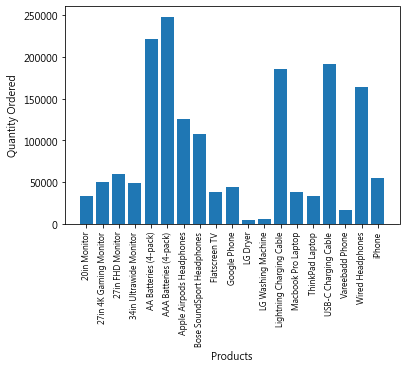

In [66]:
products = [product for product ,df in product_group]
# plt.figure(figsize=(4,3),dpi=200)
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [68]:
prices = all_months_Data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\zzy\AppData\Local\Temp/ipykernel_38476/1788807852.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


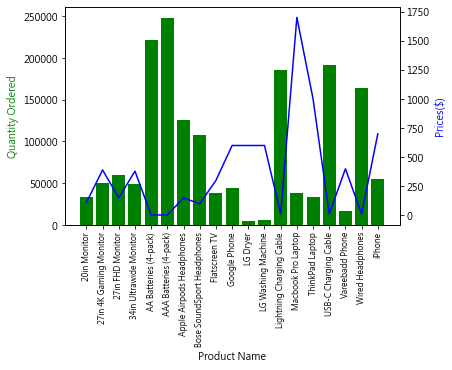

In [71]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()